<a href="https://colab.research.google.com/github/vparro/MLprobabilistico/blob/master/SIRmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Referências



1.   Modelo definido a partir do material aberto: http://courses.washington.edu/b578a/readings/
2.   Inspirado na publicação: https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/



# Modelo epidemiológico SIR - Suscetível - infectado e removido (recuperado)

A proposta é introduzir um modelo determinístico para análise de evolução de uma epidemia. O modelo aqui representado foi inicialmente proposto por   Kermack, W. and McKendrick, A., 1927. A contribution to the mathematical theory of epidemics. Proc. R. Soc. London A 115, 700-721. O modelo tem as seguintes premissas:

1.   Uma posulação invariante no tempo com **N** individuos (fechada).
2.   Taxas constantes: contato e remoção.
3.   Desconsiderando variações demográficas: nascimentos e mortes.
4.   População "bem misturada".

O modelo é fundamentado em três estados: **S** - suscetível, **I** - infectado e **R** - removido ou recuperado.

$$ S(t)+I(t)+R(t)= N$$


In [0]:
# Tamanho da populção - N
N = 500
# Valores iniciais 
I0 = 1 
R0 = 0
S0 = N - I0


O conjunto de equações diferenciais que caracteriza o modelo é descrito abaixo. No modelo $$\beta - \text{representa a taxa de transmissão ou taxa efetiva de contato} $$  e $$r - \text{a taxa de remoção ou recuperação.}$$ 


$$ \begin{split}
   \frac{dS(t)}{dt} & = -\beta S(t) I(t) \\
   \frac{dI(t)}{dt} & = \beta S(t) I(t) - rI(t)  \\
   \frac{dR(t)}{dt} & = r I(t)
   \end{split}$$

In [0]:

# Definição do conjunto de equações diferencias não lineares que formam o modelo.

def SIRm(y, t, N, Beta, r):
    S, I, R = y
    Sdot = -(Beta * S * I)
    Idot = (Beta * S * I)  - r * I
    Rdot = r * I
    return Sdot, Idot, Rdot

# Analisando a evolução da epidemia para valores específicos de $\beta$ e $r$

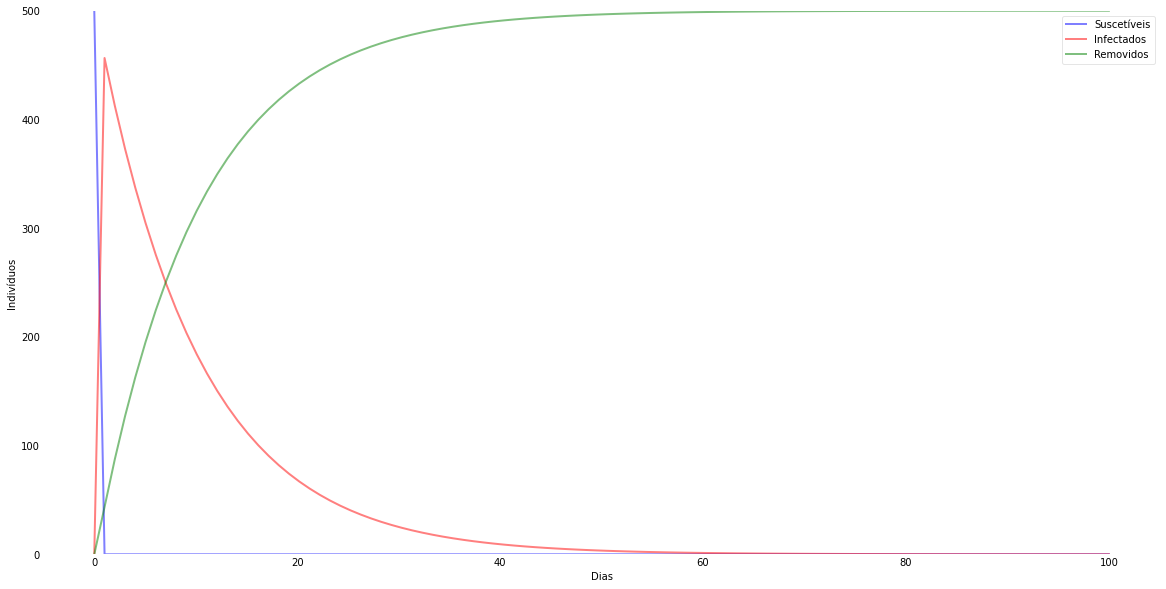

In [0]:
# Beta -  taxa de contato,
# r - taxa média de recuperação (in 1/dia).
Beta = 0.125
r = 1e-1

# Resolução da simulação - Escala temporal (dias)
t = np.linspace(0, 100, 100)

# Vetor de condições iniciais
y0 = S0, I0, R0

# Integrando as Equações do modelo SIR
ret = odeint(SIRm, y0, t, args=(N, Beta, r))
S, I, R = ret.T

# Visualizando a evolução da Epidemia - S(t), I(t) e R(t)
fig = plt.figure(facecolor='w',figsize=(20,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Suscetíveis')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Removidos')
ax.set_xlabel('Dias')
ax.set_ylabel('Indivíduos')
ax.set_ylim(0,500)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()